<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/gam_modeling_13_09_2021/model_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
install.packages("car")
install.packages('gratia')
install.packages("tscount")
install.packages("mgcViz")
install.packages('caTools')
install.packages("AER")
install.packages("surveillance", repos = "http://cran.rstudio.com/")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
require(nlme)
require(mgcv)
library("car")
library('gratia')
library("ggplot2")
library(tscount)
library(mgcViz)
library(dplyr)
library(surveillance)

In [38]:
fp = "https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/main/data/Q1_transform_hourly_arrivals_dataset.csv"
data = read.csv(fp)

In [39]:
data

h,arr.h.28.,arr.h.26.,arr.h.25.,arr.h.21.,arr.h.20.,arr.h.19.,arr.h.18.,arr.h.17.,arr.h.14.,⋯,arr.h.6.,arr.h.5.,arr.h.4.,arr.h.3.,arr.h.2.,arr.h.1.,Day,Week,Month,arr.h.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>
06:00:00,0,0,0,7,6,5,1,0,0,⋯,1,5,3,1,0,0,Thursday,1,1,0
07:00:00,0,0,6,6,5,1,0,0,0,⋯,5,3,1,0,0,0,Thursday,1,1,0
08:00:00,0,6,5,5,1,0,0,0,0,⋯,3,1,0,0,0,0,Thursday,1,1,1
09:00:00,0,5,5,1,0,0,0,0,3,⋯,1,0,0,0,0,1,Thursday,1,1,3
10:00:00,6,5,7,0,0,0,0,0,6,⋯,0,0,0,0,1,3,Thursday,1,1,4
11:00:00,5,7,6,0,0,0,0,0,7,⋯,0,0,0,1,3,4,Thursday,1,1,5
12:00:00,5,6,5,0,0,0,0,3,12,⋯,0,0,1,3,4,5,Thursday,1,1,7
13:00:00,7,5,1,0,0,0,3,6,8,⋯,0,1,3,4,5,7,Thursday,1,1,3
14:00:00,6,1,0,0,0,3,6,7,1,⋯,1,3,4,5,7,3,Thursday,1,1,5


In [40]:
 str(data)

'data.frame':	1036 obs. of  26 variables:
 $ h        : chr  "06:00:00" "07:00:00" "08:00:00" "09:00:00" ...
 $ arr.h.28.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.26.: num  0 0 6 5 5 7 6 5 1 0 ...
 $ arr.h.25.: num  0 6 5 5 7 6 5 1 0 0 ...
 $ arr.h.21.: num  7 6 5 1 0 0 0 0 0 0 ...
 $ arr.h.20.: num  6 5 1 0 0 0 0 0 0 3 ...
 $ arr.h.19.: num  5 1 0 0 0 0 0 0 3 6 ...
 $ arr.h.18.: num  1 0 0 0 0 0 0 3 6 7 ...
 $ arr.h.17.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.14.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.13.: num  0 0 3 6 7 12 8 1 5 3 ...
 $ arr.h.12.: num  0 3 6 7 12 8 1 5 3 1 ...
 $ arr.h.11.: num  3 6 7 12 8 1 5 3 1 0 ...
 $ arr.h.10.: num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.9. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.7. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.6. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.5. : num  5 3 1 0 0 0 0 1 3 4 ...
 $ arr.h.4. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ arr.h.3. : num  1 0 0 0 0 1 3 4 5 7 ...
 $ arr.h.2. : num  0 0 0 0 1 3 4 5 7 3 ...
 $ arr.h.1. : num  0 0 0

In [41]:
data$Day = recode(data$Day, 
       "Sunday"="1",
       "Monday"="2",
       "Tuesday"="3",
       "Wednesday"="4",
       "Thursday"="5",
       "Friday"="6")

In [42]:
data$h=strptime(data$h,format = "%H:%M:%S")

In [43]:
data=transform(data,h=as.numeric(data$h),Day=as.numeric(data$Day),Week=as.numeric(data$Week),Month=as.numeric(data$Month))

In [44]:
str(data)

'data.frame':	1036 obs. of  26 variables:
 $ h        : num  1.63e+09 1.63e+09 1.63e+09 1.63e+09 1.63e+09 ...
 $ arr.h.28.: num  0 0 0 0 6 5 5 7 6 5 ...
 $ arr.h.26.: num  0 0 6 5 5 7 6 5 1 0 ...
 $ arr.h.25.: num  0 6 5 5 7 6 5 1 0 0 ...
 $ arr.h.21.: num  7 6 5 1 0 0 0 0 0 0 ...
 $ arr.h.20.: num  6 5 1 0 0 0 0 0 0 3 ...
 $ arr.h.19.: num  5 1 0 0 0 0 0 0 3 6 ...
 $ arr.h.18.: num  1 0 0 0 0 0 0 3 6 7 ...
 $ arr.h.17.: num  0 0 0 0 0 0 3 6 7 12 ...
 $ arr.h.14.: num  0 0 0 3 6 7 12 8 1 5 ...
 $ arr.h.13.: num  0 0 3 6 7 12 8 1 5 3 ...
 $ arr.h.12.: num  0 3 6 7 12 8 1 5 3 1 ...
 $ arr.h.11.: num  3 6 7 12 8 1 5 3 1 0 ...
 $ arr.h.10.: num  6 7 12 8 1 5 3 1 0 0 ...
 $ arr.h.9. : num  7 12 8 1 5 3 1 0 0 0 ...
 $ arr.h.7. : num  8 1 5 3 1 0 0 0 0 1 ...
 $ arr.h.6. : num  1 5 3 1 0 0 0 0 1 3 ...
 $ arr.h.5. : num  5 3 1 0 0 0 0 1 3 4 ...
 $ arr.h.4. : num  3 1 0 0 0 0 1 3 4 5 ...
 $ arr.h.3. : num  1 0 0 0 0 1 3 4 5 7 ...
 $ arr.h.2. : num  0 0 0 0 1 3 4 5 7 3 ...
 $ arr.h.1. : num  0 0 

In [45]:
library(caTools)

In [46]:
library("AER")

# Month 1

In [47]:
data.m1=subset(data,data$Month==1)

In [48]:
length(unique(data.m1$Week))

[1] 5

In [49]:
set.seed(42)
sample = sample.split(data.m1,SplitRatio = 0.7 )
df.m1=subset(data.m1,sample ==TRUE)
df.m1.test=subset(data.m1,sample ==FALSE)

In [50]:
m0.poisson.ar.m1 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                              s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                              s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h),
                              family = poisson, data = df.m1, method = "ML")

In [51]:
m0.nb.ar.m1 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = nb, data = df.m1, method = "ML")

In [52]:
AIC (m0.poisson.ar.m1, m0.nb.ar.m1)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m1,34.41008,670.0866
m0.nb.ar.m1,35.40994,672.0868


In [53]:
options(repr.plot.width = 8, repr.plot.height = 8)

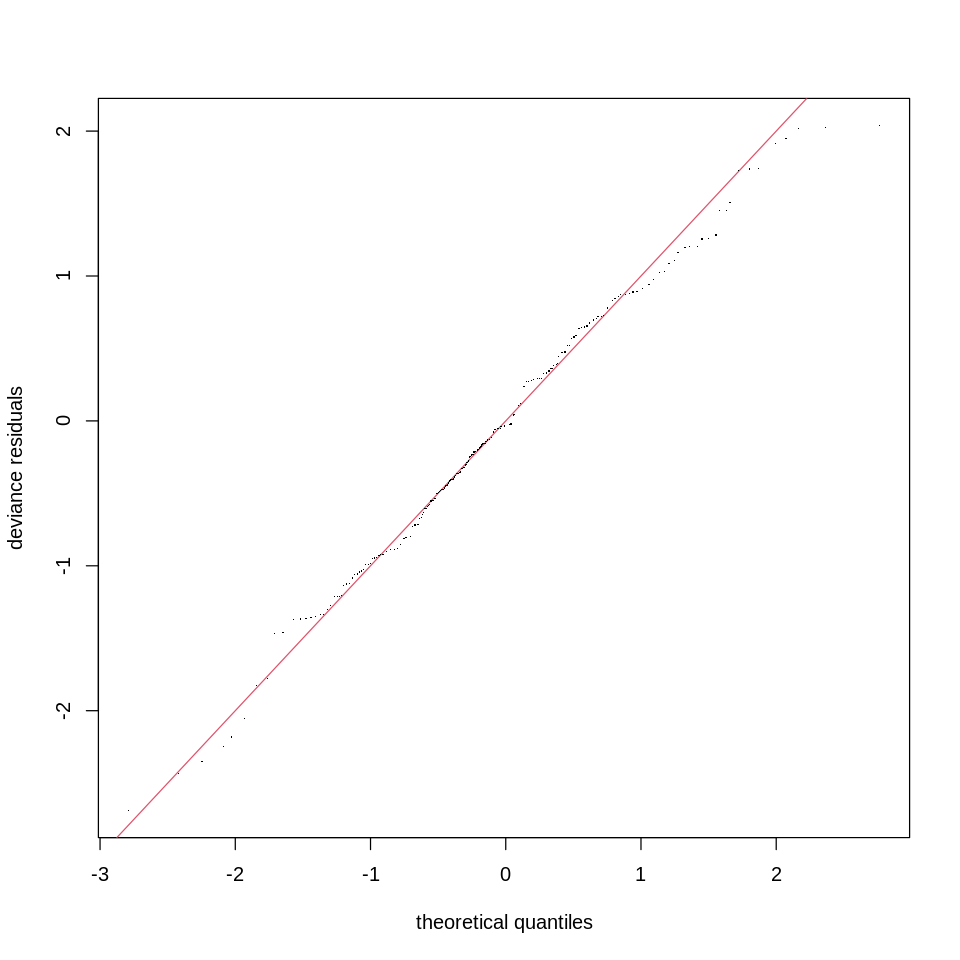

In [54]:
qq.gam(m0.poisson.ar.m1)

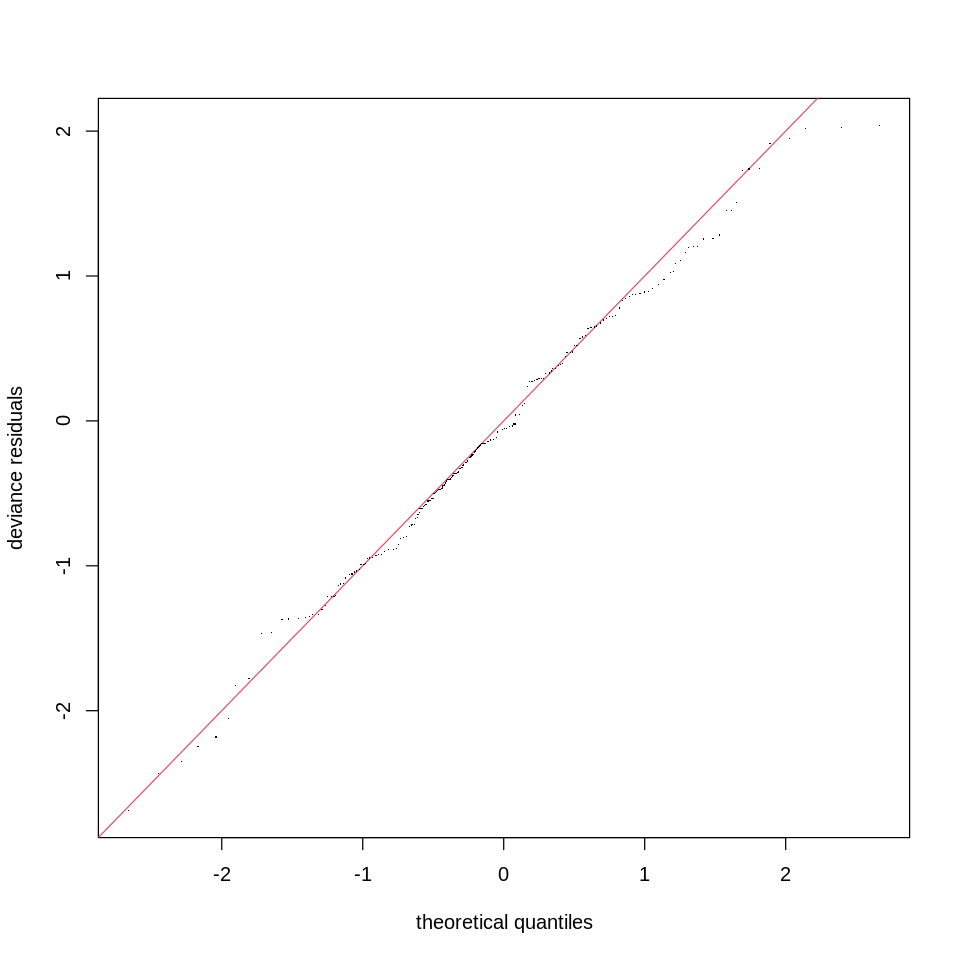

In [55]:
qq.gam(m0.nb.ar.m1)

In [56]:
summary(m0.poisson.ar.m1)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + 
    s(arr.h.20.) + s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + 
    s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + 
    s(arr.h.10.) + s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + 
    s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
    s(Day, k = 6) + s(Week, k = 5) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) 0.007685   0.138987   0.055    0.956

Approximate significance of smooth terms:
               edf Ref.df Chi.sq p-value    
s(arr.h.28.) 1.000  1.000  0.000  0.9985    
s(arr.h.26.) 2.310  2.916  7.867  0.0334 *  
s(arr.h.25.) 1.000  1.000  1.723  0.1893    
s(arr.h.21.) 1.000  1.000  1.365  0.2426    
s(arr.h.20.) 1.000  1.000  0.340  0.5596    
s(arr.h.19.) 1.000  1.000  0.068  0.7936    
s(arr.h.18.) 1.000  1.000  0.020  0.8881    
s(arr.h.17.) 1.000  1.000  2.008  0.1565    
s

In [57]:
t2 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = poisson, data = df.m1, method = "ML")
t1 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5),
                        family = poisson, data = df.m1, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m1, method = "ML")


## Explained variance by significant smooth terms

In [58]:
cat("The variance explained by 's(arr.h.2.)' is","\n",(deviance(t2)-deviance(m0.poisson.ar.m1))/deviance(t0))

The variance explained by 's(arr.h.2.)' is 
 -0.00157988

In [59]:
cat("The variance explained by 's(h)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m1))/deviance(t0))

The variance explained by 's(h)' is 
 0.04824856

### The statistically significant smooth terms are s(h).

## Vizualization of smooth terms

In [60]:
sg.poisson.ar.m1 = gam(arr.h. ~ s(h),family = poisson, data = df.m1, method = "ML")

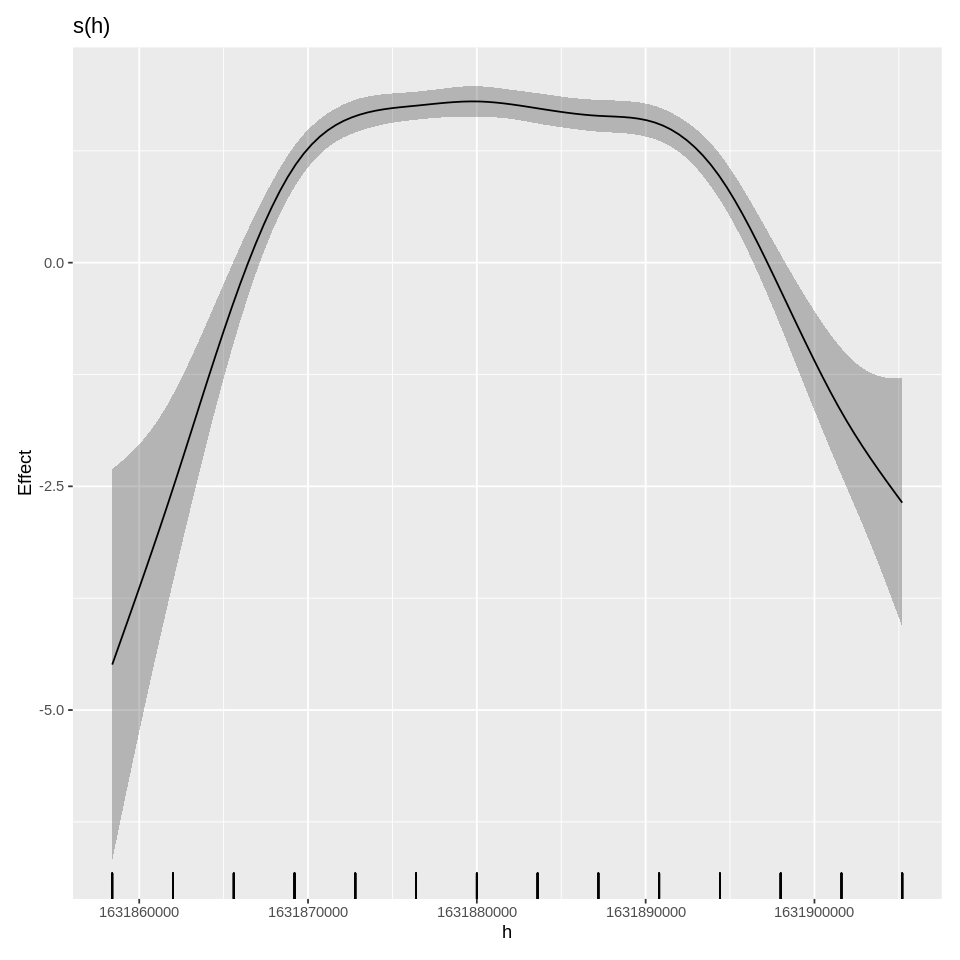

In [61]:
draw(sg.poisson.ar.m1)

## Prediction vs Actual

In [62]:
pred.arr.h=exp(predict.gam(sg.poisson.ar.m1,df.m1.test))

In [63]:
mean(pred.arr.h)

[1] 2.893871

In [64]:
act.arr.h=df.m1.test$arr.h.

In [65]:
mean(act.arr.h)

[1] 2.904255

In [66]:
mu=mean(pred.arr.h)
weighted.mean(scores(act.arr.h, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 4.74547

In [67]:
scoring(act.arr.h, pred.arr.h, distr="poisson", individual=FALSE)[3]

spherical 
-0.5691296

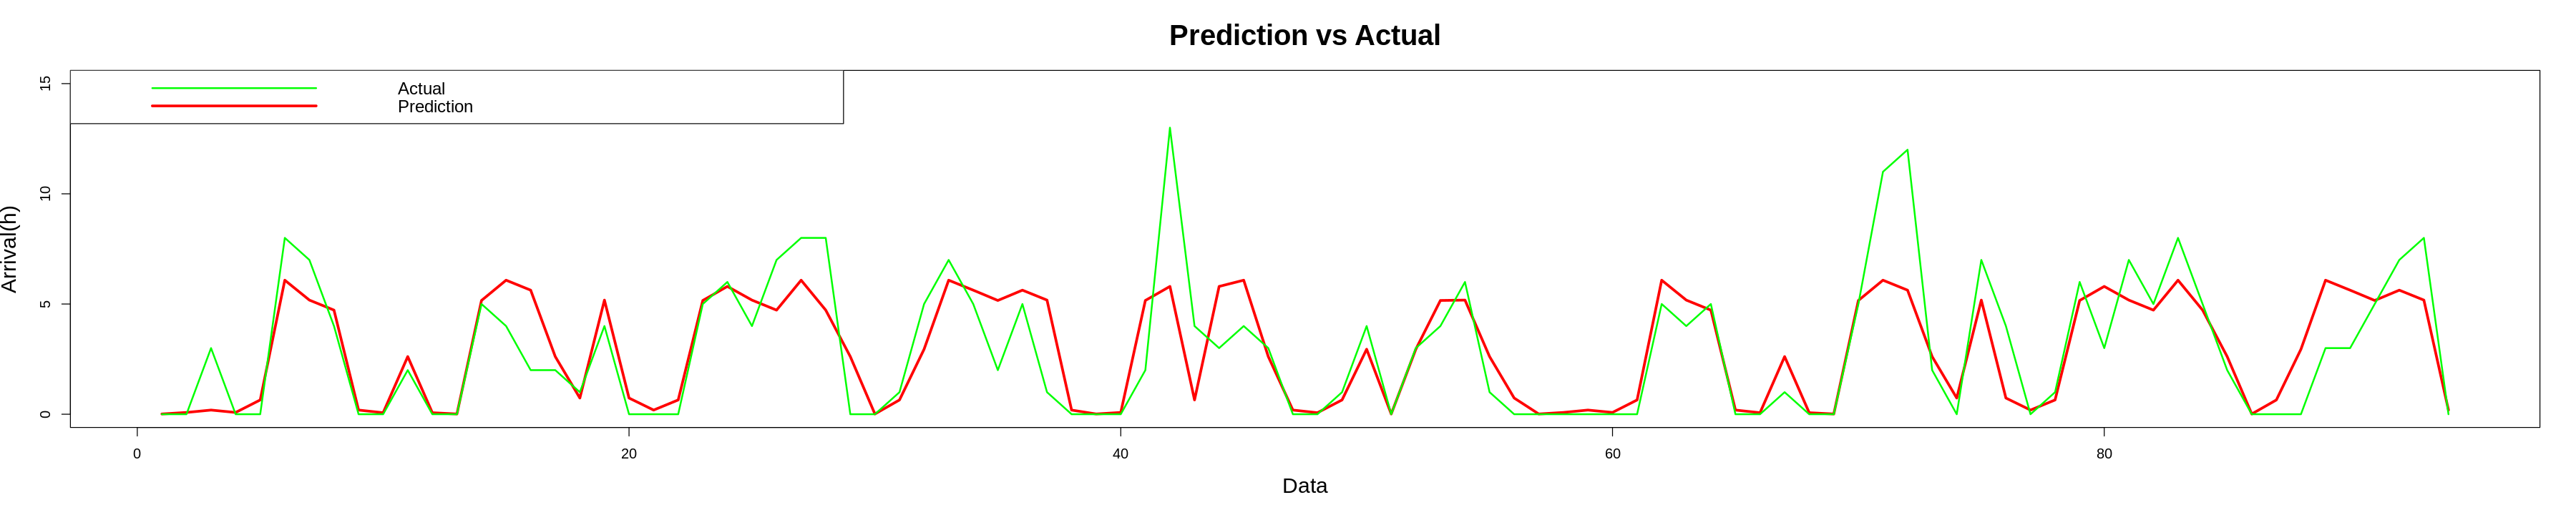

In [68]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)

# Month 2

In [69]:
data.m2=subset(data,data$Month==2)

In [70]:
length(unique(data.m2$Week))

[1] 5

In [71]:
set.seed(42)
sample = sample.split(data.m2,SplitRatio = 0.7 )
df.m2=subset(data.m2,sample ==TRUE)
df.m2.test=subset(data.m2,sample ==FALSE)

In [72]:
m0.poisson.ar.m2 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                              s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                              s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h),
                              family = poisson, data = df.m2, method = "ML")

In [73]:
m0.nb.ar.m2 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = nb, data = df.m2, method = "ML")

In [74]:
AIC (m0.poisson.ar.m2, m0.nb.ar.m2)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m2,37.14613,703.4587
m0.nb.ar.m2,38.14610,705.4588


In [75]:
options(repr.plot.width = 8, repr.plot.height = 8)

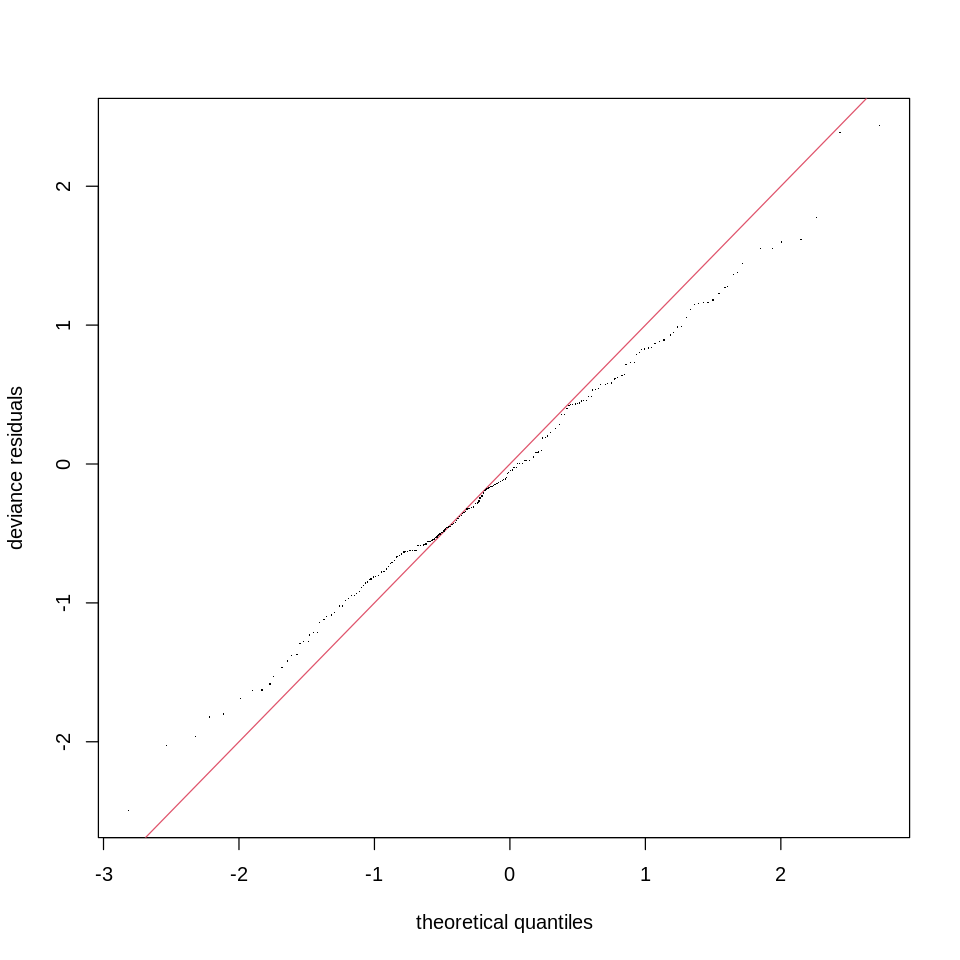

In [76]:
qq.gam(m0.poisson.ar.m2)

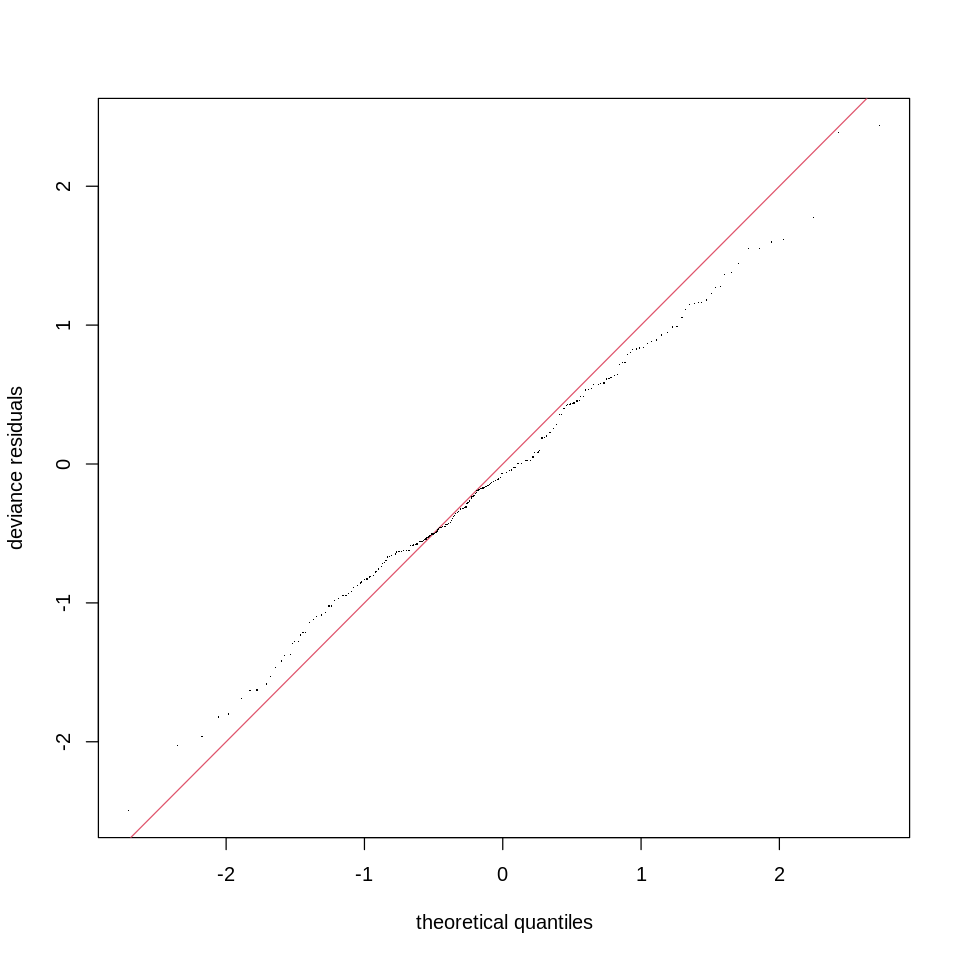

In [77]:
qq.gam(m0.nb.ar.m2)

In [78]:
summary(m0.poisson.ar.m2)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + 
    s(arr.h.20.) + s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + 
    s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + 
    s(arr.h.10.) + s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + 
    s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
    s(Day, k = 6) + s(Week, k = 5) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   0.1212     0.1152   1.053    0.292

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(arr.h.28.) 1.000  1.000  0.556 0.455765    
s(arr.h.26.) 1.000  1.000  0.522 0.469974    
s(arr.h.25.) 1.000  1.000  0.356 0.550940    
s(arr.h.21.) 1.000  1.000  0.012 0.913054    
s(arr.h.20.) 1.000  1.000  0.154 0.694396    
s(arr.h.19.) 1.000  1.000  1.750 0.185849    
s(arr.h.18.) 1.881  2.374  4.115 0.178146    
s(arr.h.17.) 1.000  1.000  0.024 0.876

In [79]:
t1 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) +
                        s(Week,k=5) + s(h),
                        family = poisson, data = df.m2, method = "ML")
t2 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(h),
                        family = poisson, data = df.m2, method = "ML")
t3 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5),
                        family = poisson, data = df.m2, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m2, method = "ML")


## Explained variance by significant smooth terms

In [80]:
cat("The variance explained by 's(Day)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m2))/deviance(t0))

The variance explained by 's(Day)' is 
 0.01790858

In [81]:
cat("The variance explained by 's(Week)' is","\n",(deviance(t2)-deviance(m0.poisson.ar.m2))/deviance(t0))

The variance explained by 's(Week)' is 
 0.01391398

In [82]:
cat("The variance explained by 's(h)' is","\n",(deviance(t3)-deviance(m0.poisson.ar.m2))/deviance(t0))

The variance explained by 's(h)' is 
 0.04889735

### The statistically significant smooth terms are s(Day), s(Week) and s(h).

## Vizualization of smooth terms

In [83]:
sg.poisson.ar.m2 = gam(arr.h. ~ s(Day,k=6) + s(Week,k=5) + s(h),family = poisson, data = df.m2, method = "ML")

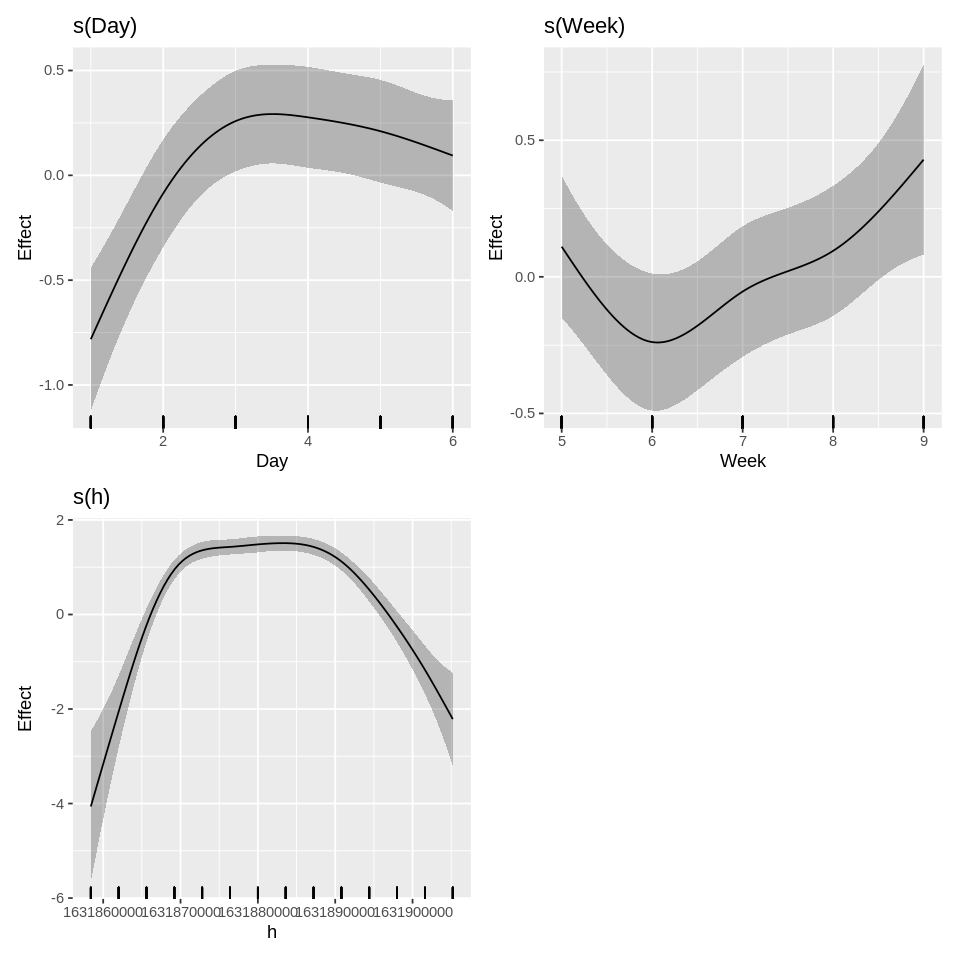

In [84]:
draw(sg.poisson.ar.m2)

## Prediction vs Actual

In [85]:
pred.arr.h=exp(predict.gam(sg.poisson.ar.m2,df.m2.test))

In [86]:
mean(pred.arr.h)

[1] 2.735446

In [87]:
act.arr.h=df.m2.test$arr.h.

In [88]:
mean(act.arr.h)

[1] 3.019231

In [89]:
mu=mean(pred.arr.h)
weighted.mean(scores(act.arr.h, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 5.020851

In [90]:
scoring(act.arr.h, pred.arr.h, distr="poisson", individual=FALSE)[3]

spherical 
-0.5322057

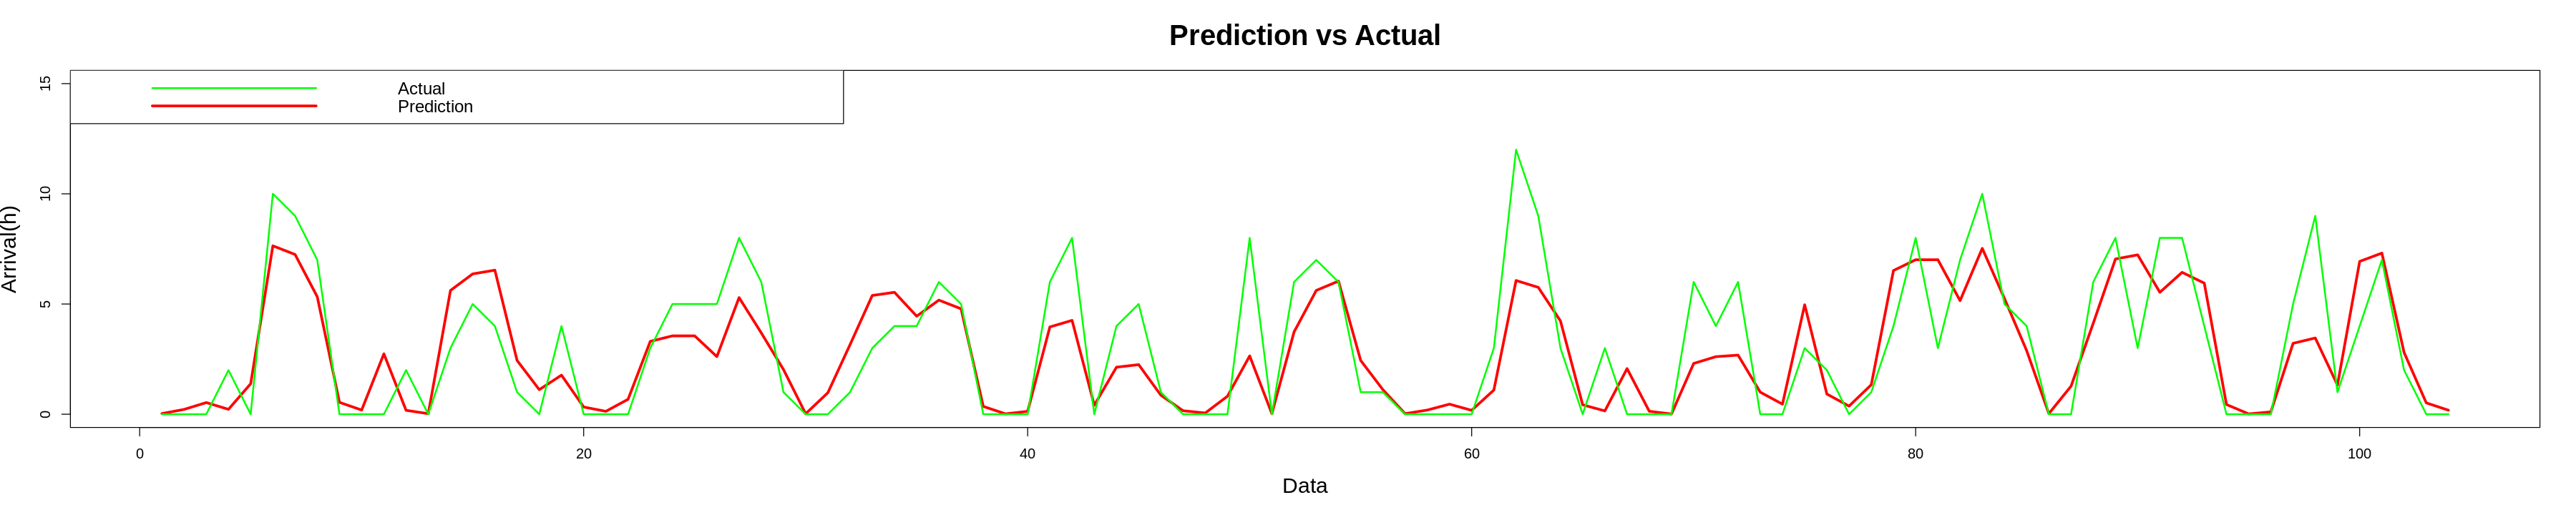

In [91]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)

# Month 3

In [92]:
data.m3=subset(data,data$Month==3)

In [93]:
length(unique(data.m3$Week))

[1] 5

In [94]:
set.seed(42)
sample = sample.split(data.m3,SplitRatio = 0.7 )
df.m3=subset(data.m3,sample ==TRUE)
df.m3.test=subset(data.m3,sample ==FALSE)

In [95]:
m0.poisson.ar.m3 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                              s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                              s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                              s(Day,k=6) + s(Week,k=5) + s(h),
                              family = poisson, data = df.m3, method = "ML")

In [96]:
m0.nb.ar.m3 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = nb, data = df.m3, method = "ML")

In [97]:
AIC (m0.poisson.ar.m3, m0.nb.ar.m3)

,df,AIC
,<dbl>,<dbl>
m0.poisson.ar.m3,46.56264,876.2980
m0.nb.ar.m3,47.56202,878.2994


In [98]:
options(repr.plot.width = 8, repr.plot.height = 8)

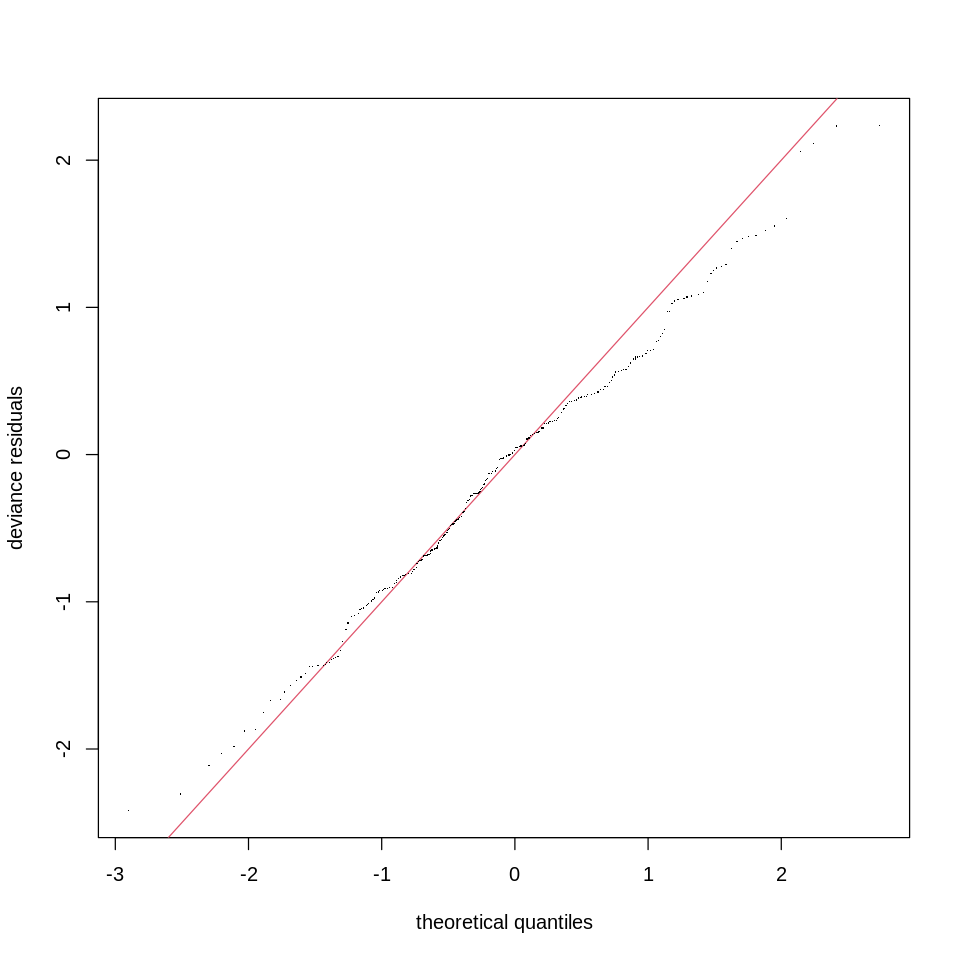

In [99]:
qq.gam(m0.poisson.ar.m3)

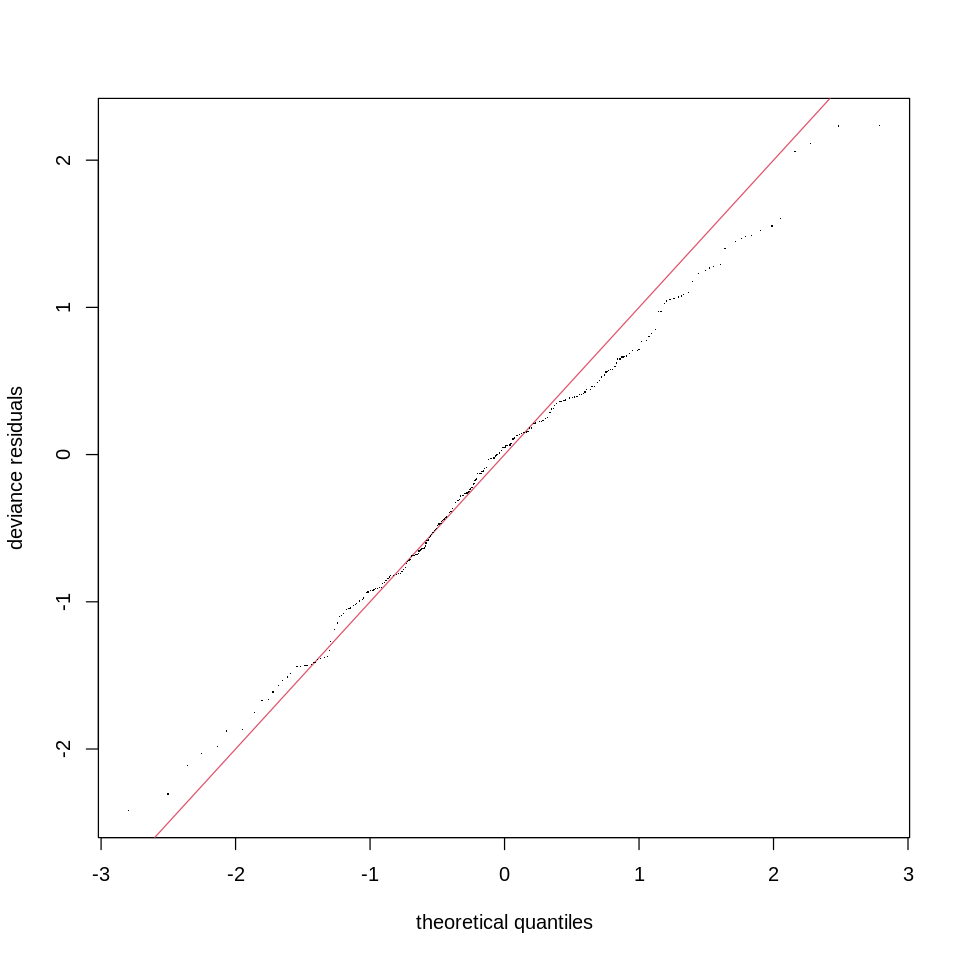

In [100]:
qq.gam(m0.nb.ar.m3)

In [101]:
summary(m0.poisson.ar.m3)


Family: poisson 
Link function: log 

Formula:
arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + 
    s(arr.h.20.) + s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + 
    s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + 
    s(arr.h.10.) + s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + 
    s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
    s(Day, k = 6) + s(Week, k = 5) + s(h)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.42548    0.08682   4.901 9.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(arr.h.28.) 1.000  1.000  0.000 0.998166    
s(arr.h.26.) 2.093  2.641  8.996 0.033655 *  
s(arr.h.25.) 1.000  1.000  0.008 0.927847    
s(arr.h.21.) 4.510  5.452 17.721 0.005574 ** 
s(arr.h.20.) 1.000  1.000  0.608 0.435732    
s(arr.h.19.) 1.899  2.383  6.375 0.056356 .  
s(arr.h.1

In [102]:
t1 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) +
                        s(Day,k=6) + s(Week,k=5) + s(h),
                        family = poisson, data = df.m3, method = "ML")
t2 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Week,k=5) + s(h),
                        family = poisson, data = df.m3, method = "ML")
t3 = gam(arr.h. ~ s(arr.h.28.) + s(arr.h.26.) + s(arr.h.25.) + s(arr.h.21.) + s(arr.h.20.) + 
                        s(arr.h.19.) + s(arr.h.18.) + s(arr.h.17.) + s(arr.h.14.) + s(arr.h.13.) + s(arr.h.12.) + s(arr.h.11.) + s(arr.h.10.) +
                        s(arr.h.9.) + s(arr.h.7.) + s(arr.h.6.) + s(arr.h.5.) + s(arr.h.4.) + s(arr.h.3.) + s(arr.h.2.) + s(arr.h.1.) + 
                        s(Day,k=6) + s(Week,k=5),
                        family = poisson, data = df.m3, method = "ML")

t0 = gam(arr.h.~1,family = poisson, data = df.m3, method = "ML")


## Explained variance by significant smooth terms

In [103]:
cat("The variance explained by 's(arr.h.5)' is","\n",(deviance(t1)-deviance(m0.poisson.ar.m3))/deviance(t0))

The variance explained by 's(arr.h.5)' is 
 0.03125682

In [104]:
cat("The variance explained by 's(Day)' is","\n",(deviance(t2)-deviance(m0.poisson.ar.m3))/deviance(t0))

The variance explained by 's(Day)' is 
 0.01864766

In [105]:
cat("The variance explained by 's(h)' is","\n",(deviance(t3)-deviance(m0.poisson.ar.m3))/deviance(t0))

The variance explained by 's(h)' is 
 0.05706054

### The statistically significant smooth terms are s(arr.h.5.), s(Day) and s(h).

## Vizualization of smooth terms

In [106]:
sg.poisson.ar.m3 = gam(arr.h. ~ s(arr.h.5.) + s(Day,k=6) + s(h),family = poisson, data = df.m3, method = "ML")

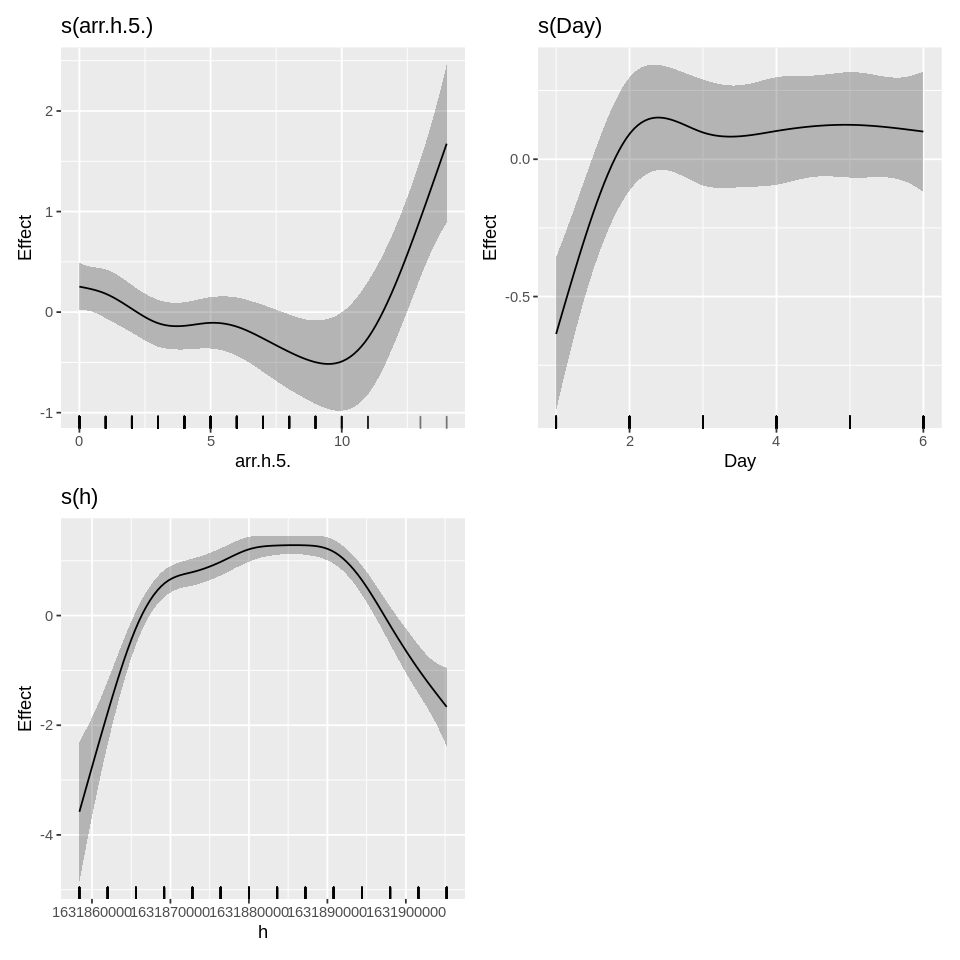

In [107]:
draw(sg.poisson.ar.m3)

## Prediction vs Actual

In [108]:
pred.arr.h=exp(predict.gam(sg.poisson.ar.m3,df.m3.test))

In [109]:
mean(pred.arr.h)

[1] 3.085829

In [110]:
act.arr.h=df.m3.test$arr.h.

In [111]:
mean(act.arr.h)

[1] 3.391304

In [112]:
mu=mean(pred.arr.h)
weighted.mean(scores(act.arr.h, mu=mu, size = NULL, which = "ses", sign =  TRUE))

[1] 5.796185

In [113]:
scoring(act.arr.h, pred.arr.h, distr="poisson", individual=FALSE)[3]

spherical 
-0.516001

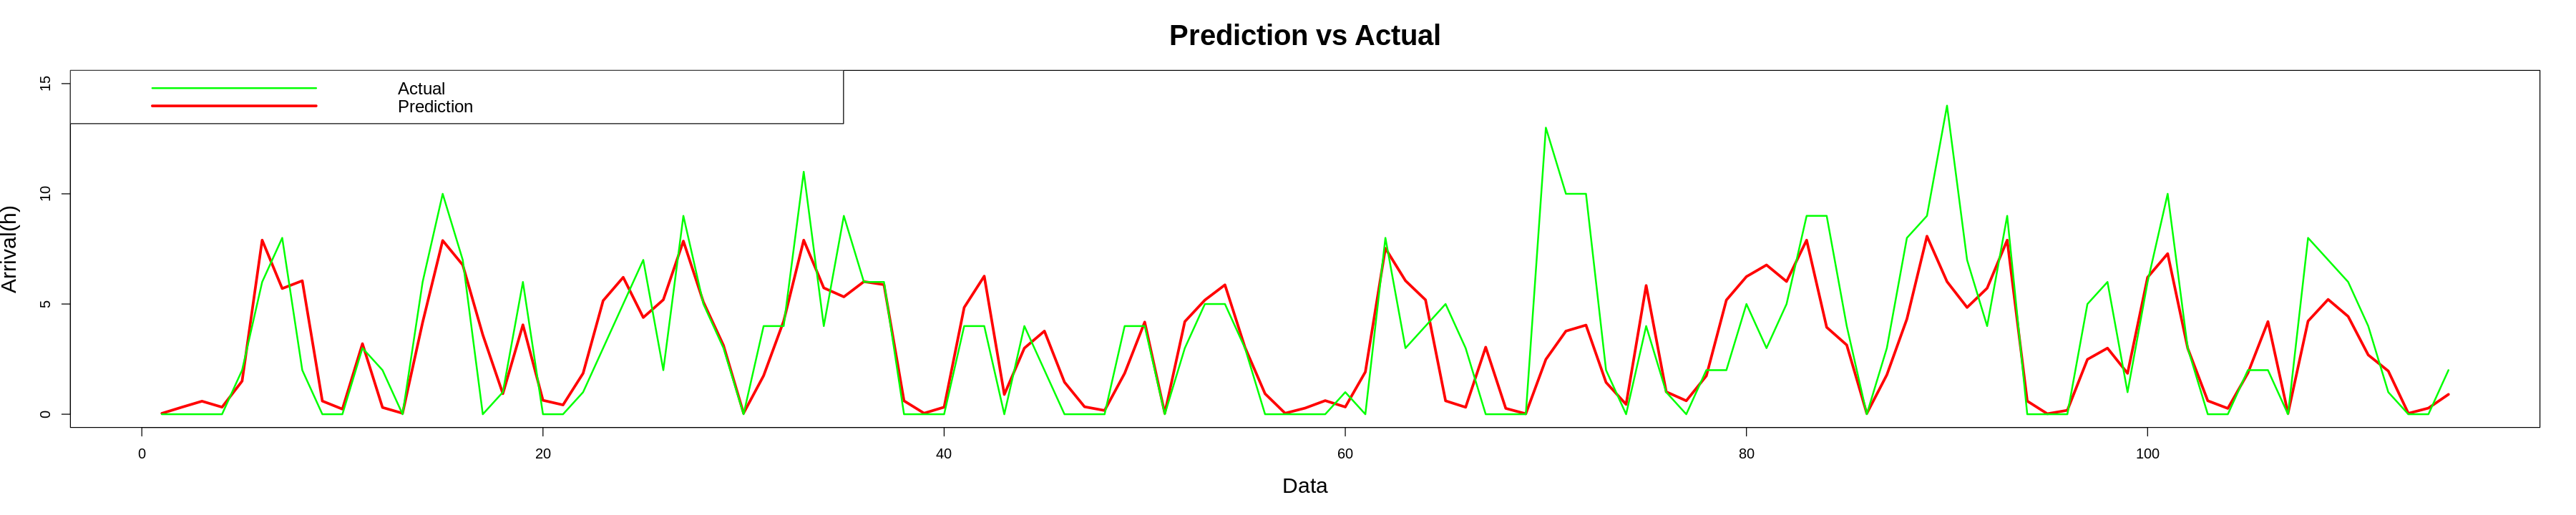

In [114]:
options(repr.plot.width = 30, repr.plot.height = 6)
plot(pred.arr.h,type="l",col="red",ylab="Arrival(h)",xlab="Data",ylim=c(0,15),lwd=3,main = "Prediction vs Actual",cex.lab=1.5,cex.main=2)
lines(act.arr.h,col="green",lwd=2)
legend("topleft",legend=c("Actual","Prediction"), col=c("green","red"),lty=c(1,1),lwd=c(2,3),bty="o",cex = 1.2)